In [1]:
# Data reading 
import pandas as pd 

# Array math 
import numpy as np

# Dates 
import datetime

# Ploting 
import matplotlib.pyplot as plt 

# Deep learning
import tensorflow as tf 

# Keras API 
from tensorflow import keras

# Deep learning 
from keras.models import Input, Model
from keras.layers import Dense, Dropout
from keras import losses

In [2]:
# Downloading data 
!python3 dataDownload.py

# Creating tidy data
!python3 createTidyData.py

Read municipality data in 0.33 seconds
Rows read: 13912
Read patient data in 0.43 seconds
Rows read: 35911
Data saved in data/2020-11-17


In [3]:
# Reading the data 
d = pd.read_csv('data/tidy_data.csv')

# Sorting by date 
d['day'] = [datetime.datetime.strptime(x, '%Y-%m-%d').date() for x in d['day']]
d.sort_values('day', inplace=True)

In [4]:
# Saving the last row for prediction 
xtest = d.iloc[-1]

In [5]:
# Extracting the Y column
Y = d['is_covid'].values.tolist()

# Lagging all the data 
d = d.shift(1)
d['Y'] = Y

# Droping the first row 
d = d.drop(0)
d.reset_index(inplace=True, drop=True)

In [6]:
# Defining how many last day data to use in validation 
n_last = 0

# Spliting to training and validation sets 
validation = d.tail(n_last)
train = d[~d.index.isin(validation.index)]

In [7]:
# Creating X and Y matrices for deep learning 
X, Y = train.drop(['day', 'Y'], axis=1), train['Y']
Xval, Yval = validation.drop(['day', 'Y'], axis=1), validation['Y']

In [8]:
print(f'Input dimension: {X.shape}')

Input dimension: (250, 217)


In [9]:
X.tail()

,is_covid,is_cured-0-9Moteris,is_cured-0-9Vyras,is_cured-10-19Moteris,is_cured-10-19Vyras,is_cured-100-109Moteris,is_cured-100-109Vyras,is_cured-120-129Moteris,is_cured-20-29Moteris,is_cured-20-29Vyras,...,is_treated-90-99Vyras,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7,tests_total,is_quarantine
245,1433.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12255.0,1.0
246,1559.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12294.0,1.0
247,2061.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13983.0,1.0
248,1529.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,14162.0,1.0
249,1372.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8649.0,1.0


In [10]:
Y.tail()

245    1559
246    2061
247    1529
248    1372
249    1151
Name: Y, dtype: int64

In [11]:
# Input shape
inputRegression = Input(shape=(X.shape[1], ))

# Adding one output linear neuron
neuron = Dense(1, activation='linear')(inputRegression)

# Defining the model
model = Model(inputRegression, neuron)

In [12]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 217)]             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 218       
Total params: 218
Trainable params: 218
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Initiating the optimizer
optimizer = keras.optimizers.Adam(learning_rate=0.0001)

# Compiling the model
model.compile(loss=losses.MeanAbsoluteError(), optimizer=optimizer)

# Fitting the model
history = model.fit(X, Y, epochs = 600, batch_size=32, validation_data=(Xval, Yval))

Epoch 1/600
8/8 [==============================] - 0s 4ms/step - loss: 726.2743
Epoch 2/600
8/8 [==============================] - 0s 2ms/step - loss: 722.6457
Epoch 3/600
8/8 [==============================] - 0s 2ms/step - loss: 718.8752
Epoch 4/600
8/8 [==============================] - 0s 2ms/step - loss: 715.1940
Epoch 5/600
8/8 [==============================] - 0s 2ms/step - loss: 711.5415
Epoch 6/600
8/8 [==============================] - 0s 2ms/step - loss: 707.8558
Epoch 7/600
8/8 [==============================] - 0s 2ms/step - loss: 704.1313
Epoch 8/600
8/8 [==============================] - 0s 2ms/step - loss: 700.5198
Epoch 9/600
8/8 [==============================] - 0s 2ms/step - loss: 696.7759
Epoch 10/600
8/8 [==============================] - 0s 3ms/step - loss: 693.1540
Epoch 11/600
8/8 [==============================] - 0s 2ms/step - loss: 689.3818
Epoch 12/600
8/8 [==============================] - 0s 3ms/step - loss: 685.7751
Epoch 13/600
8/8 [===================

8/8 [==============================] - 0s 2ms/step - loss: 354.4781
Epoch 103/600
8/8 [==============================] - 0s 2ms/step - loss: 350.8183
Epoch 104/600
8/8 [==============================] - 0s 2ms/step - loss: 347.1338
Epoch 105/600
8/8 [==============================] - 0s 2ms/step - loss: 343.4369
Epoch 106/600
8/8 [==============================] - 0s 2ms/step - loss: 339.7624
Epoch 107/600
8/8 [==============================] - 0s 2ms/step - loss: 336.0393
Epoch 108/600
8/8 [==============================] - 0s 2ms/step - loss: 332.3973
Epoch 109/600
8/8 [==============================] - 0s 2ms/step - loss: 328.6723
Epoch 110/600
8/8 [==============================] - 0s 2ms/step - loss: 325.0767
Epoch 111/600
8/8 [==============================] - 0s 2ms/step - loss: 321.3575
Epoch 112/600
8/8 [==============================] - 0s 2ms/step - loss: 317.6212
Epoch 113/600
8/8 [==============================] - 0s 2ms/step - loss: 313.9981
Epoch 114/600
8/8 [===========

8/8 [==============================] - 0s 2ms/step - loss: 79.7122
Epoch 203/600
8/8 [==============================] - 0s 2ms/step - loss: 79.5489
Epoch 204/600
8/8 [==============================] - 0s 2ms/step - loss: 79.3635
Epoch 205/600
8/8 [==============================] - 0s 2ms/step - loss: 79.2239
Epoch 206/600
8/8 [==============================] - 0s 2ms/step - loss: 79.0275
Epoch 207/600
8/8 [==============================] - 0s 2ms/step - loss: 78.8910
Epoch 208/600
8/8 [==============================] - 0s 2ms/step - loss: 78.6773
Epoch 209/600
8/8 [==============================] - 0s 2ms/step - loss: 78.5363
Epoch 210/600
8/8 [==============================] - 0s 2ms/step - loss: 78.3453
Epoch 211/600
8/8 [==============================] - 0s 2ms/step - loss: 78.1820
Epoch 212/600
8/8 [==============================] - 0s 2ms/step - loss: 78.0101
Epoch 213/600
8/8 [==============================] - 0s 2ms/step - loss: 77.8410
Epoch 214/600
8/8 [=======================

8/8 [==============================] - 0s 2ms/step - loss: 64.3741
Epoch 304/600
8/8 [==============================] - 0s 2ms/step - loss: 64.2463
Epoch 305/600
8/8 [==============================] - 0s 2ms/step - loss: 64.1200
Epoch 306/600
8/8 [==============================] - 0s 3ms/step - loss: 63.9975
Epoch 307/600
8/8 [==============================] - 0s 2ms/step - loss: 63.8862
Epoch 308/600
8/8 [==============================] - 0s 2ms/step - loss: 63.7563
Epoch 309/600
8/8 [==============================] - 0s 2ms/step - loss: 63.6453
Epoch 310/600
8/8 [==============================] - 0s 2ms/step - loss: 63.5251
Epoch 311/600
8/8 [==============================] - 0s 2ms/step - loss: 63.4098
Epoch 312/600
8/8 [==============================] - 0s 2ms/step - loss: 63.2778
Epoch 313/600
8/8 [==============================] - 0s 2ms/step - loss: 63.1638
Epoch 314/600
8/8 [==============================] - 0s 2ms/step - loss: 63.0417
Epoch 315/600
8/8 [=======================

8/8 [==============================] - 0s 2ms/step - loss: 52.1689
Epoch 405/600
8/8 [==============================] - 0s 2ms/step - loss: 52.0560
Epoch 406/600
8/8 [==============================] - 0s 2ms/step - loss: 51.9296
Epoch 407/600
8/8 [==============================] - 0s 2ms/step - loss: 51.8069
Epoch 408/600
8/8 [==============================] - 0s 2ms/step - loss: 51.6781
Epoch 409/600
8/8 [==============================] - 0s 2ms/step - loss: 51.5574
Epoch 410/600
8/8 [==============================] - 0s 2ms/step - loss: 51.4453
Epoch 411/600
8/8 [==============================] - 0s 2ms/step - loss: 51.3069
Epoch 412/600
8/8 [==============================] - 0s 2ms/step - loss: 51.1964
Epoch 413/600
8/8 [==============================] - 0s 2ms/step - loss: 51.0912
Epoch 414/600
8/8 [==============================] - 0s 2ms/step - loss: 50.9440
Epoch 415/600
8/8 [==============================] - 0s 2ms/step - loss: 50.8286
Epoch 416/600
8/8 [=======================

8/8 [==============================] - 0s 2ms/step - loss: 43.4604
Epoch 506/600
8/8 [==============================] - 0s 2ms/step - loss: 43.4025
Epoch 507/600
8/8 [==============================] - 0s 2ms/step - loss: 43.3539
Epoch 508/600
8/8 [==============================] - 0s 2ms/step - loss: 43.2936
Epoch 509/600
8/8 [==============================] - 0s 2ms/step - loss: 43.2455
Epoch 510/600
8/8 [==============================] - 0s 2ms/step - loss: 43.1978
Epoch 511/600
8/8 [==============================] - 0s 3ms/step - loss: 43.1406
Epoch 512/600
8/8 [==============================] - 0s 2ms/step - loss: 43.0793
Epoch 513/600
8/8 [==============================] - 0s 2ms/step - loss: 43.0634
Epoch 514/600
8/8 [==============================] - 0s 2ms/step - loss: 42.9719
Epoch 515/600
8/8 [==============================] - 0s 2ms/step - loss: 42.9272
Epoch 516/600
8/8 [==============================] - 0s 2ms/step - loss: 42.8993
Epoch 517/600
8/8 [=======================

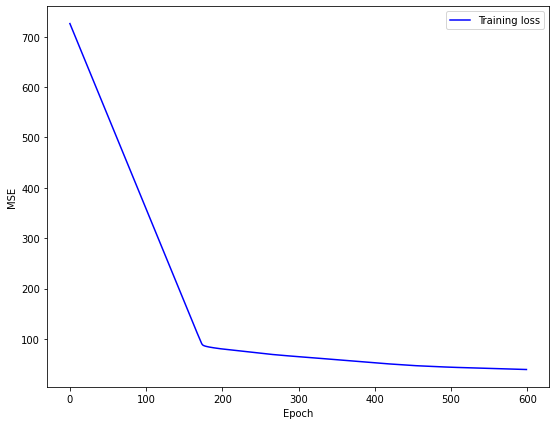

In [14]:
mse = history.history['loss']
val_loss = history.history.get('val_loss')

epochs = range(len(mse))

plt.figure(figsize=(9, 7))
plt.plot(epochs, mse, 'r', label='Training loss', color='blue')
if val_loss is not None:
    plt.plot(epochs, val_loss, 'r', label='Validation loss', color='red')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

In [15]:
# Preparing input for the model 
x = xtest[X.columns].values.astype('float32')
x = np.reshape(x, (1, X.shape[1]))

# Predicting 
model.predict(x)

array([[990.932]], dtype=float32)

In [16]:
# Extracting model weights
w = [x[0] for x in model.weights[0].numpy()]

In [17]:
dcoef = pd.DataFrame({'feature': X.columns, 'w': w})
dcoef.sort_values('w', inplace=True)

In [18]:
dcoef

,feature,w
175,is_other-50-59Moteris,-0.184873
76,is_hospitalized-120-129Moteris,-0.164591
157,is_nonsick-70-79Vyras,-0.162979
171,is_other-30-39Moteris,-0.162794
158,is_nonsick-80-89Moteris,-0.160522
...,...,...
201,is_treated-60-69Vyras,0.478399
192,is_treated-20-29Moteris,0.487164
9,is_cured-20-29Vyras,0.490963
14,is_cured-50-59Moteris,0.501350
